 # Mocodes
 Mocode is in pdf format. The pdf will be converted to a spreadsheet.

In [24]:
import tabula 
#https://tabula-py.readthedocs.io/en/latest/tabula.html#high-level-interfaces
mocodes_legend=tabula.read_pdf("MO_CODES_Numerical_20191119.pdf", pages='all', area=[70,12.75,750,280])


In [25]:
import pandas as pd
print(mocodes_legend.head())
print("\n")
print(mocodes_legend.info())

   Unnamed: 0           Unnamed: 1    N
0       100.0  Suspect Impersonate  NaN
1       101.0           Aid victim  NaN
2       102.0                Blind  NaN
3       103.0  Physically disabled  NaN
4       104.0             Customer  NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  824 non-null    float64
 1   Unnamed: 1  828 non-null    object 
 2   N           17 non-null     object 
dtypes: float64(1), object(2)
memory usage: 19.9+ KB
None


In [26]:
# remove last col 
mocodes_legend.drop(['N'], axis=1, inplace=True)

# rename col
mocodes_legend.columns=("Mocodes", "expansion")

# covert Mocodes col type
mocodes_legend=mocodes_legend.astype({"Mocodes": 'str'})

# Mocode col: 100.0-> 100 
mocodes_legend.Mocodes=mocodes_legend.Mocodes.str.split('.', expand=True)[[0]]

# add "0" to mocode if len(Mocode)<3: 100-> 0100 
## https://stackoverflow.com/questions/54974563/creating-new-column-based-on-conditions-and-values-from-other-columns-in-a-panda?noredirect=1&lq=1
mocodes_legend['condition'] = mocodes_legend.Mocodes.apply(len)==3
mocodes_legend.Mocodes= mocodes_legend.apply(lambda x: x['Mocodes'] if x['condition']==False else '0'+ x['Mocodes'], axis=1)
mocodes_legend.drop(['condition'], axis=1, inplace=True)  

#remove NAN expansion 
mocodes_legend= mocodes_legend.dropna(subset=['expansion'])

# keep numeric  Mocodes
mocodes_legend=mocodes_legend[mocodes_legend.Mocodes.str.isnumeric()]

# export as csv 
mocodes_legend.to_csv('extra_mocodes.csv', index = False) 

# Vict Descent
The details of the victims' ethnicity will be scrapped.


### Learning points
- [`BeautifulSoup` unable to scrape dynamic webpages](https://www.geeksforgeeks.org/scrape-content-from-dynamic-websites/); will result in empty values
- `scrapy` will provide empty values if Xpath or CSS provided. query only scrape earlier generations (i.e. can scrape `/html/body/main/div/div[1]/div` instead of  `/html/body/main/div/div[1]/div/div[2]/section[2]/div/div[1]/table/tbody/tr[27]/td[2]/div/span/text()`)
- Need to use `selenium` for dynamic webpages

# getting and storring static html 

In [27]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome("c:\\chromedriver.exe")
driver.get('https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z')
html=driver.page_source
import requests 
from bs4 import BeautifulSoup 
soup=BeautifulSoup(html, "html.parser")
soup

<html lang="en"><!--
  Powered by Socrata
  http://www.socrata.com
  --><head><style id="autocompletion.css">.ace_editor.ace_autocomplete .ace_marker-layer .ace_active-line {    background-color: #CAD6FA;    z-index: 1;}.ace_dark.ace_editor.ace_autocomplete .ace_marker-layer .ace_active-line {    background-color: #3a674e;}.ace_editor.ace_autocomplete .ace_line-hover {    border: 1px solid #abbffe;    margin-top: -1px;    background: rgba(233,233,253,0.4);    position: absolute;    z-index: 2;}.ace_dark.ace_editor.ace_autocomplete .ace_line-hover {    border: 1px solid rgba(109, 150, 13, 0.8);    background: rgba(58, 103, 78, 0.62);}.ace_completion-meta {    opacity: 0.5;    margin: 0.9em;}.ace_completion-message {    color: blue;}.ace_editor.ace_autocomplete .ace_completion-highlight{    color: #2d69c7;}.ace_dark.ace_editor.ace_autocomplete .ace_completion-highlight{    color: #93ca12;}.ace_editor.ace_autocomplete {    width: 300px;    z-index: 200000;    border: 1px lightgray solid; 

The description is found under the `span` tag with attribute `class` equals to `Linkify`.

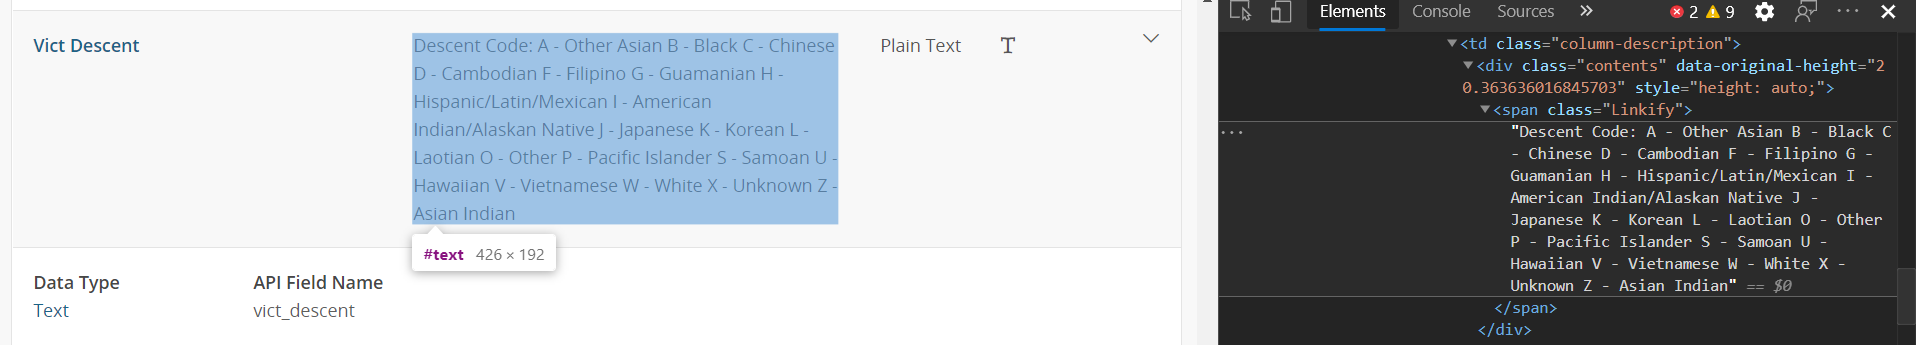

In [28]:
span_Linkify=soup.find_all('span', {'class':"Linkify"})

## getting the relevant section into a list

In [29]:
all_text=[textt.text for textt in span_Linkify]
all_text # need to isolate Descent Code

['LAPD',
 'Weekly',
 'Yes',
 'Latitude/longitude',
 'Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits',
 'MM/DD/YYYY',
 'MM/DD/YYYY',
 'In 24 hour military time.',
 'The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.',
 'The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.',
 'A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4 ',
 '',
 'Indicates the crime comm

In [30]:
# enumerate items in the list to easily isolate `Descent Code....`
### https://stackoverflow.com/questions/10777271/python-using-enumerate-inside-list-comprehension
print("Enumerated list:\n" , [(i,j) for (i,j) in enumerate(all_text)], "\n")
descent_code=[(i,j) for (i,j) in enumerate(all_text)][17][1]
print("Successful isolation of Descent Code:\n", descent_code)

Enumerated list:
 [(0, 'LAPD'), (1, 'Weekly'), (2, 'Yes'), (3, 'Latitude/longitude'), (4, 'Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits'), (5, 'MM/DD/YYYY'), (6, 'MM/DD/YYYY'), (7, 'In 24 hour military time.'), (8, 'The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.'), (9, 'The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.'), (10, 'A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f839

In [31]:
# remove "Descent Code"
### # https://stackoverflow.com/questions/12883376/remove-the-first-word-in-a-python-string
descent_code =descent_code.split(' ', 2)[2]
descent_code # isolate the abbrevations into a list and the expansion as another list. combine both list a df and export as a spreasheet.

'A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian'

## create abbervation list

In [32]:
import re
abbrevation= re.findall("[A-Z]\s", descent_code)
abbrevation

['A ',
 'B ',
 'C ',
 'D ',
 'F ',
 'G ',
 'H ',
 'I ',
 'J ',
 'K ',
 'L ',
 'O ',
 'P ',
 'S ',
 'U ',
 'V ',
 'W ',
 'X ',
 'Z ']

In [33]:
# remove whitespacing
### https://stackoverflow.com/questions/3232953/python-removing-spaces-from-list-objects
abbrevation=[item.replace(" ", "")for item in abbrevation]
abbrevation 

['A',
 'B',
 'C',
 'D',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'O',
 'P',
 'S',
 'U',
 'V',
 'W',
 'X',
 'Z']

## create expansion list

In [34]:
expansion=re.split('[A-Z]\s\-\s', descent_code)
expansion

['',
 'Other Asian ',
 'Black ',
 'Chinese ',
 'Cambodian ',
 'Filipino ',
 'Guamanian ',
 'Hispanic/Latin/Mexican ',
 'American Indian/Alaskan Native ',
 'Japanese ',
 'Korean ',
 'Laotian ',
 'Other ',
 'Pacific Islander ',
 'Samoan ',
 'Hawaiian ',
 'Vietnamese ',
 'White ',
 'Unknown ',
 'Asian Indian']

In [35]:
# remove 1st item
###https://stackoverflow.com/questions/4426663/how-to-remove-the-first-item-from-a-list
expansion=expansion[1:]
# remove whitespacing
expansion=[item.replace(" ", "") for item in expansion]
expansion

['OtherAsian',
 'Black',
 'Chinese',
 'Cambodian',
 'Filipino',
 'Guamanian',
 'Hispanic/Latin/Mexican',
 'AmericanIndian/AlaskanNative',
 'Japanese',
 'Korean',
 'Laotian',
 'Other',
 'PacificIslander',
 'Samoan',
 'Hawaiian',
 'Vietnamese',
 'White',
 'Unknown',
 'AsianIndian']

# create df to export as csv

In [36]:
#https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/
vict_descent=pd.DataFrame({'Vict Descent': abbrevation, 'Race': expansion})

In [37]:
vict_descent.to_csv("extra_race.csv", index=False)